
@Name         :      Ashwani Kumar Patel
@designation  :      M.tech [ Climate science and technology ]
@institute    :      Indian Institute of Technology-Bhubaneswar


# 1. Procuring and Reading Geospatial Data

1. Temperature of air at 2m above the surface - (2m Temperature - 2019 - December - All 31 days - 12:00 - Whole Available Region - NetCDF)

2. Total precipitation - (Total Precipitation - 2019 - December - All 31 days -12:00 - Whole Available Region - NetCDF)

3. Volumetric soil water layer 1 - (Volumetric soil water layer 1 - 2019 - December - All 31 days - 12:00 - Whole Available Region - NetCDF)

## Code for CDS API to download the three datasets outlined above

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '2m_temperature', 'total_precipitation', 'volumetric_soil_water_layer_1',
        ],
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    'download.nc')

###  Print all the basic attributes of the datasets

In [1]:
import xarray as xr
# the line above is necessary for getting plot embedded within the notebook
%matplotlib inline
dset = xr.open_dataset("/home/seocspc04/Downloads/adaptor.mars.internal-1604394192.6064982-12478-16-aa111512-bc0a-45bd-b881-829116d11037 .nc")
print(dset)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-03 09:03:43 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


# 2. Exploring and Visualising Geospatial Data


### Calculate the basic statistics (mean, median, standard dev., variance, range, spatial resolution) for each of the datasets

In [2]:
# Calculation of Statics for Temperature

temp           =dset['t2m']
temp_mean      =temp.mean(dim=('time','latitude','longitude'))
temp_median    =temp.median(dim=('time','latitude','longitude'))
temp_std       =temp.std(dim=('time','latitude','longitude'))
temp_varriance =temp.var(dim=('time','latitude','longitude'))

# Calculation of Statics for Total precipitation

tp          =dset['tp']
tp_mean     =tp.mean(dim=('time','latitude','longitude'))
tp_median   =tp.median(dim=('time','latitude','longitude'))
tp_std      =tp.std(dim=('time','latitude','longitude'))
tp_varriance=tp.var(dim=('time','latitude','longitude'))


# Calculation of Statics for Volumetric soil water layer 1

vswl1          =dset['swvl1']
vswl1_mean     =vswl1.mean(dim=('time','latitude','longitude'))
vswl1_median   =vswl1.median(dim=('time','latitude','longitude'))
vswl1_std      =vswl1.std(dim=('time','latitude','longitude'))
vswl1_varriance=vswl1.var(dim=('time','latitude','longitude'))

## Prin all for temp
print("Temp_mean:",temp_mean)
print("Temp_median:",temp_median)
print("Temp_std:",temp_std)
print("Temp_varriance:",temp_varriance)

## Prin all for Total precipitation
print("Tp_mean:",tp_mean)
print("Tp_median:",tp_median)
print("Tp_std:",tp_std)
print("Tp_varriance:",tp_varriance)

## Prin all for Volumetric soil water layer 1
print("vswl1_mean:",vswl1_mean)
print("vswl1_median:",vswl1_median)
print("vswl1_std:",vswl1_std)
print("vswl1_varriance:",vswl1_varriance)

Temp_mean: <xarray.DataArray 't2m' ()>
array(268.24347, dtype=float32)
Temp_median: <xarray.DataArray 't2m' ()>
array(264.07800293)
Temp_std: <xarray.DataArray 't2m' ()>
array(21.81747, dtype=float32)
Temp_varriance: <xarray.DataArray 't2m' ()>
array(476.00198, dtype=float32)
Tp_mean: <xarray.DataArray 'tp' ()>
array(0.00069312, dtype=float32)
Tp_median: <xarray.DataArray 'tp' ()>
array(1.67042017e-05)
Tp_std: <xarray.DataArray 'tp' ()>
array(0.0025754, dtype=float32)
Tp_varriance: <xarray.DataArray 'tp' ()>
array(6.632711e-06, dtype=float32)
vswl1_mean: <xarray.DataArray 'swvl1' ()>
array(0.2649494, dtype=float32)
vswl1_median: <xarray.DataArray 'swvl1' ()>
array(0.27160251)
vswl1_std: <xarray.DataArray 'swvl1' ()>
array(0.13019994, dtype=float32)
vswl1_varriance: <xarray.DataArray 'swvl1' ()>
array(0.01695202, dtype=float32)


## Value of all static parameter

    varr                                mean          median     stander_deviation       varriance

    Temperature                        268.243        264.07         21.817                476.00
    Total Precipitation                0.00069        1.6704         0.00257               6.6327
    Volumetric soil water layer 1      0.2649         0.2716         0.1301                0.016

# Checking for missing data

In [10]:
print("Mising data for Temperature")
print(temp)


print('Mising data for Total Precipitation')
print(tp)


print('Mising data for Volumetric soil water layer 1')
print(vswl1)

Mising data for Temperature
<xarray.DataArray 't2m' (time: 31, latitude: 1801, longitude: 3600)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [241.74222, 241.74222, ..., 241.74222, 241.74222],
        [241.6848 , 241.6848 , ..., 241.6848 , 241.6848 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [242.84796, 242.8465 , ..., 242.8465 , 242.8465 ],
        [242.34442, 242.34442, ..., 242.34442, 242.34442]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [248.28394, 248.28394, ..., 248.27658, 248.27951],
        [247.66113, 247.66113, ..., 247.66113, 247.66113]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
      

# NOTE 1
 Above showing all NaN values, indicate that their is no data avlable at that grid point.

# NOTE 2

### For handling missing data  i can put "privious point data" or "forword point data" and fill those gap their data is not avlable

# 1. forward-fill
data.fillna(method='ffill')

# 2.  back-fill
data.fillna(method='bfill')

#  Plot a randomly chosen day  (12-12-2019)  from each of the datasets 

### (i)  Spatial plot fot Temp

Text(0.5, 1.0, 'Temperature')

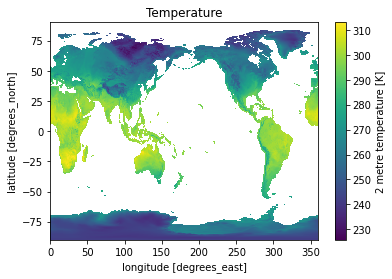

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
## Spatial plot fot Temp

# ''''tp = dset['tp'].isel(time=11)''''     # We can read by this method for a perticular day
# plt.figure(figsize=(5,5))
# plt.subplot(1,3,1)
temp1= temp.sel(time=slice('2019-12-01', '2019-12-01'))
temp1.plot()
plt.title("Temperature")


### (ii) Spatial plot for Total Precipitation

Text(0.5, 1.0, 'Total Precipitation')

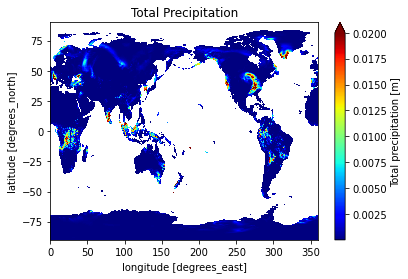

In [6]:
# Spatial plot for Total Precipitation
tp1= tp.sel(time=slice('2019-12-01', '2019-12-01'))
tp1.plot(cmap='jet', vmax=0.02)
# tp1.plot()
plt.title("Total Precipitation")

### (iii)  Spatial plot for Volumetric soil water layer 1

Text(0.5, 1.0, 'Volumetric soil water layer 1')

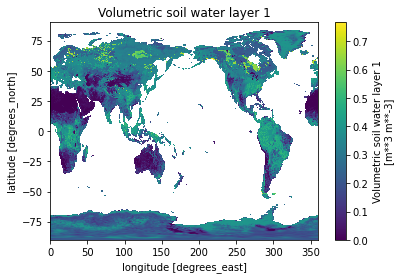

In [10]:
# Spatial plot for Volumetric soil water layer 1
vswl12= vswl1.sel(time=slice('2019-12-01', '2019-12-01'))
vswl12.plot()
plt.title("Volumetric soil water layer 1")

# Comment

1. we can clearly saw that the southern part area temperature is high in comparison to the Northern part.
2. Southern part rain is high in comparison to the Northern part because their temp is low so evaporation is very low.
3. At the equator high rain area is shown because at the equator direct sun radiation is fall down and a high quantity of water evaporate.
4. in the Volumetric soil water layer plot we can clearly see that their soil water content is low called desert.
5. Soil temperature affects plant growth indirectly by affecting water and nutrient uptake as well as root growth. At a constant moisture content, a decrease in temperature results in a decrease in water and nutrient uptake. At low temperatures, transport from the root to the shoot and vice versa is reduced. we can see clearly in above figure.

6. At latitude (-25 to 25 Degree) we can clearly see that in that region temp, precipitation and Volumetric soil water layer is strongly directly proportional related to all these parameters is high.

7. In the Northern part (75-90 degree) Volumetric soil water layer is inversely proposal to temp and precipitation.

# Distribution of the datasets

### Temperatue

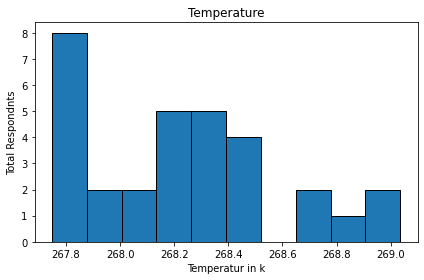

In [9]:
# temperatue
midian_temp=temp.mean(dim=('latitude','longitude'))
plt.hist(midian_temp,edgecolor='black')
plt.title("Temperature")
plt.xlabel("Temperatur in k")
plt.ylabel("Total Respondnts")
plt.tight_layout()

## Comment
we can clearly see in the diagram that 267.8k temp occur higest (8) days. in the month of December higest temp is 269k and average temp is 268.23 k

### Total Precipitation

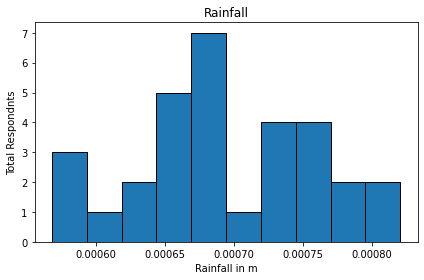

In [10]:
# Total Precipitation
midian_tp=tp.mean(dim=('latitude','longitude'))
plt.hist(midian_tp,edgecolor='black')
plt.title("Rainfall")
plt.xlabel("Rainfall in m")
plt.ylabel("Total Respondnts")
plt.tight_layout()

# Comment
we can clearly see in the diagram that 0.67 mm rain occur higest (7) days. in the month of December higest rain fall 0.8 mm and average rain fall is 0.67 mm

### Volumetric soil water layer 

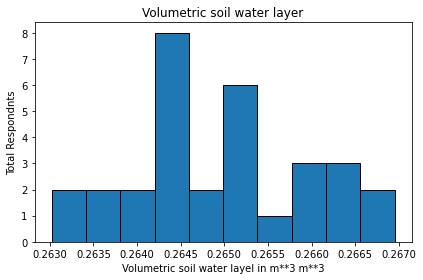

In [11]:
#Volumetric soil water laye
midian_vswl1=vswl1.mean(dim=('latitude','longitude'))
plt.hist(midian_vswl1,edgecolor='black')
plt.title("Volumetric soil water layer")
plt.xlabel("Volumetric soil water layel in m**3 m**3")
plt.ylabel("Total Respondnts")
plt.tight_layout()

# Comment
we can clearly see in the diagram that 0.26 m**3m**3 Volumetric soil water layer occur higest (8) days. in the month of December higest Volumetric soil water layer fall 0.27 m**3m**3 and average rain fall is 0.264 m**3m**3

# 3. Preprocessing Geospatial Data

##  Increase resolution to 0.05 degree x 0.05 degree by upscaling using linear interpolation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Temperature Raw data

Text(0.5, 1.0, 'Interpolated temp data')

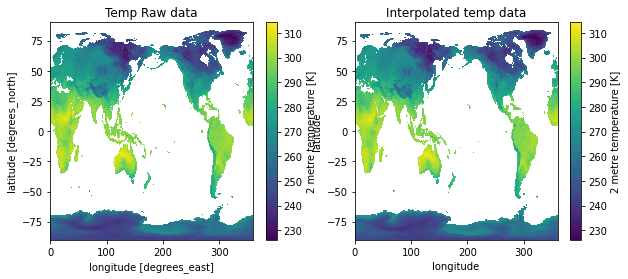

In [2]:
# Temperature Raw data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
ds = dset['t2m'].isel(time=11)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ds.plot(ax=axes[0])
axes[0].set_title("Temp Raw data")

# Interpolated data                                               ## we can interpolate by this method also
# new_lon = np.linspace(ds.longitude[0], ds.longitude[-1],num=len(l)*2)
# new_lat = np.linspace(ds.latitude[0], ds.latitude[-1],num=len(t)*2)
# dsi = ds.interp(latitude=new_lat, longitude=new_lon)

dx_new = 0.05
newlon = np.arange(0, 360, dx_new)
newlat = np.arange(-90, 90+dx_new, dx_new)
# Interpolate
data_set_interp = ds.interp(latitude=newlat, longitude=newlon)
data_set_interp.plot(ax=axes[1])
axes[1].set_title("Interpolated temp data")

### Total Precipitation Raw data

Text(0.5, 1.0, 'Interpolated data')

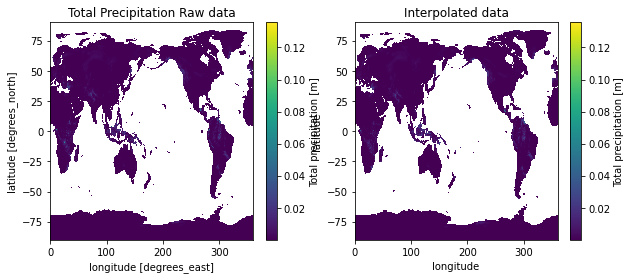

In [3]:
# Total Precipitation Raw data
ds = dset['tp'].isel(time=11)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ds.plot(ax=axes[0])
axes[0].set_title("Total Precipitation Raw data")

dx_new = 0.05
newlon = np.arange(0, 360, dx_new)
newlat = np.arange(-90, 90+dx_new, dx_new)
# Interpolate
data_set_interp = ds.interp(latitude=newlat, longitude=newlon)
data_set_interp.plot(ax=axes[1])
axes[1].set_title("Interpolated data")


### Volumetric soil water layer Raw data

Text(0.5, 1.0, 'Interpolated data')

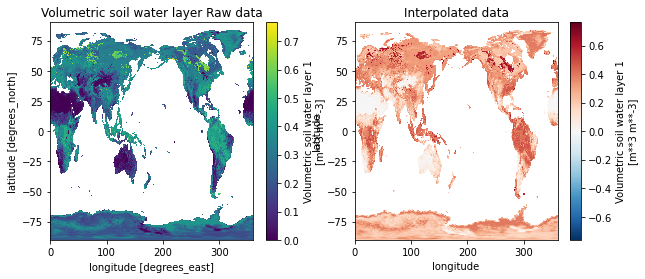

In [4]:
# Volumetric soil water layer Raw data
ds = dset['swvl1'].isel(time=11)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ds.plot(ax=axes[0])
axes[0].set_title("Volumetric soil water layer Raw data")

dx_new = 0.05
newlon = np.arange(0, 360, dx_new)

newlat = np.arange(-90, 90+dx_new, dx_new)
# Interpolate
data_set_interp = ds.interp(latitude=newlat, longitude=newlon)
data_set_interp.plot(ax=axes[1])
axes[1].set_title("Interpolated data")